<a href="https://colab.research.google.com/github/bezkwag/sideproject/blob/main/%22%EC%A0%88%EB%8C%80_%EC%98%A4%EC%8B%9C%EA%B0%80_%EC%83%9D%EA%B8%B0%EB%8A%94_%EB%B0%A9%22%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%B4%EC%84%9C_%EC%95%99%EC%8A%A4%ED%83%80_%EC%BA%90%EB%A6%AD%ED%84%B0_%EC%9C%A0%ED%98%95%EC%9D%84_%EB%82%98%EB%88%A0%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#"절대 오시가 생기는 방"을 활용해서 앙스타 캐릭터 유형을 나눠보자

연결문서 링크:

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [54]:
df=pd.read_csv('/content/drive/MyDrive/oshidata.csv')

In [55]:
df.head()

,Unnamed: 0,데이트1,데이트2,과목1,과목2,메일1,메일2,아침1,아침2,멋1,멋2
0,나기사,1,-1,-4,-1,2,1,0,1,4,-3
1,나즈나,-1,0,0,1,-1,1,0,0,2,3
2,나츠메,3,-3,-3,3,-2,0,0,-3,3,0
3,니키,-1,3,4,2,4,-1,-4,-4,1,-1
4,레오,-3,1,4,-1,4,-3,2,1,0,0


In [56]:
df = df.set_index(df.columns[0])

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

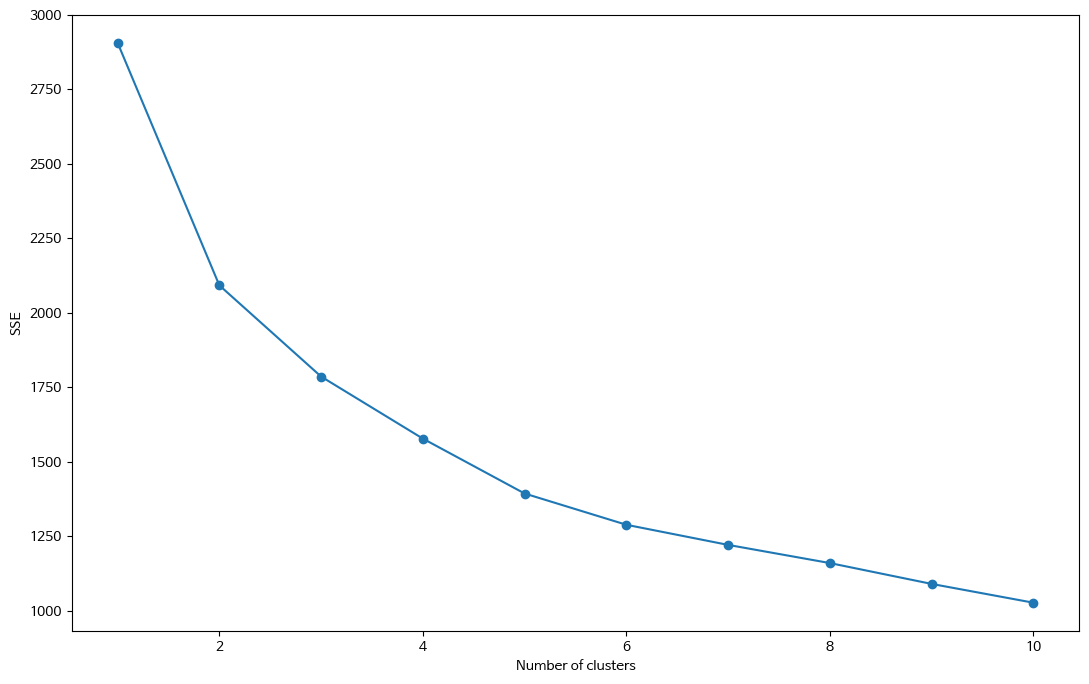

In [58]:
plt.figure(figsize=(13,8))

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [59]:
kmeans=KMeans(n_clusters=5, random_state=0)
clusters=kmeans.fit(df)
df2=df.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
df2['cluster']=clusters.labels_

In [61]:
df2.head()

,데이트1,데이트2,과목1,과목2,메일1,메일2,아침1,아침2,멋1,멋2,cluster
Unnamed: 0,,,,,,,,,,,
나기사,1,-1,-4,-1,2,1,0,1,4,-3,0
나즈나,-1,0,0,1,-1,1,0,0,2,3,1
나츠메,3,-3,-3,3,-2,0,0,-3,3,0,0
니키,-1,3,4,2,4,-1,-4,-4,1,-1,2
레오,-3,1,4,-1,4,-3,2,1,0,0,2


In [62]:
df2['cluster'].value_counts()

0    18
1     9
2     9
3     8
4     5
Name: cluster, dtype: int64

In [63]:
from os import sched_getaffinity
from sklearn.decomposition import PCA
X = df.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)

In [64]:
df2=df2.reset_index()

In [65]:
df2.rename(columns={df2.columns[0]: 'name'}, inplace=True)
df2.head()

,name,데이트1,데이트2,과목1,과목2,메일1,메일2,아침1,아침2,멋1,멋2,cluster
0,나기사,1,-1,-4,-1,2,1,0,1,4,-3,0
1,나즈나,-1,0,0,1,-1,1,0,0,2,3,1
2,나츠메,3,-3,-3,3,-2,0,0,-3,3,0,0
3,니키,-1,3,4,2,4,-1,-4,-4,1,-1,2
4,레오,-3,1,4,-1,4,-3,2,1,0,0,2


In [66]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster']=df2['cluster']
pca_df['name']=df2['name']
pca_df.head()

,0,1,cluster,name
0,-4.792689,2.102697,0,나기사
1,1.195183,0.220638,1,나즈나
2,-3.414143,1.107178,0,나츠메
3,2.055625,-5.863474,2,니키
4,4.924091,-1.283844,2,레오


In [67]:
pca_df.columns=['x','y','cluster','name']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


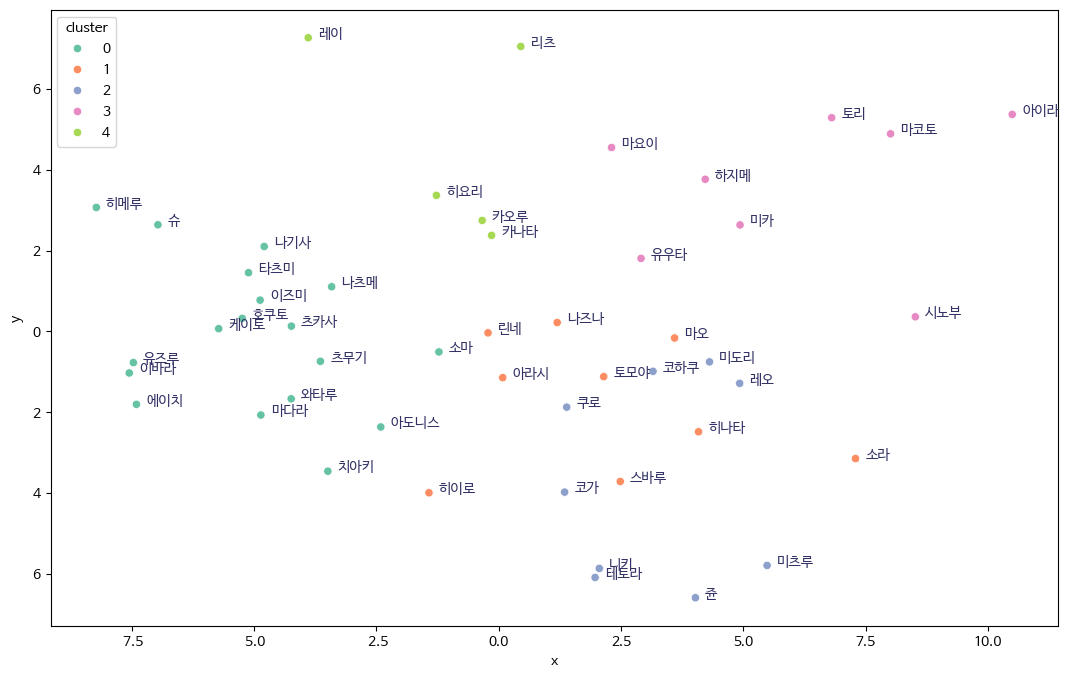

In [68]:
plt.figure(figsize=(13,8))


sns.scatterplot(x='x',y='y',hue='cluster', palette="Set2",data=pca_df)

# label points on the plot
for x, y, name in zip(pca_df['x'], pca_df['y'],pca_df['name']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x+0.2, # x-coordinate position of data label
 y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = name, # data label, formatted to ignore decimals
 color = '#333366') # set colour of line


plt.show()

In [73]:
list(pca_df[pca_df['cluster']==4]['name'])

['레이', '리츠', '카나타', '카오루', '히요리']

In [74]:
df2.head()

,name,데이트1,데이트2,과목1,과목2,메일1,메일2,아침1,아침2,멋1,멋2,cluster
0,나기사,1,-1,-4,-1,2,1,0,1,4,-3,0
1,나즈나,-1,0,0,1,-1,1,0,0,2,3,1
2,나츠메,3,-3,-3,3,-2,0,0,-3,3,0,0
3,니키,-1,3,4,2,4,-1,-4,-4,1,-1,2
4,레오,-3,1,4,-1,4,-3,2,1,0,0,2


In [77]:
df2.groupby(['cluster']).mean()

<ipython-input-77-6cde309fb4e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['cluster']).mean()


,데이트1,데이트2,과목1,과목2,메일1,메일2,아침1,아침2,멋1,멋2
cluster,,,,,,,,,,
0,1.333333,-2.444444,-3.000000,-0.222222,0.666667,1.555556,-2.666667,-1.111111,2.444444,-2.388889
1,-1.888889,1.111111,-0.888889,0.222222,-2.111111,-1.333333,-0.555556,-1.888889,0.333333,1.111111
2,-1.666667,1.000000,3.444444,-0.666667,1.444444,-1.888889,-0.666667,-2.444444,-0.666667,-1.666667
3,2.500000,2.375000,1.250000,-0.875000,-1.625000,-2.125000,1.250000,1.875000,-3.000000,2.375000
4,1.600000,-0.800000,-2.600000,-1.200000,0.000000,-1.200000,2.400000,3.000000,2.400000,-1.600000


In [78]:
df3=df.copy()

In [80]:
df3['아침1']=df3['아침1']*0.7
df3['아침2']=df3['아침2']*0.7

In [81]:
df3.head()

,데이트1,데이트2,과목1,과목2,메일1,메일2,아침1,아침2,멋1,멋2
Unnamed: 0,,,,,,,,,,
나기사,1,-1,-4,-1,2,1,0.0,0.7,4,-3
나즈나,-1,0,0,1,-1,1,0.0,0.0,2,3
나츠메,3,-3,-3,3,-2,0,0.0,-2.1,3,0
니키,-1,3,4,2,4,-1,-2.8,-2.8,1,-1
레오,-3,1,4,-1,4,-3,1.4,0.7,0,0


In [82]:
kmeans=KMeans(n_clusters=5, random_state=0)
clusters=kmeans.fit(df3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
from os import sched_getaffinity
from sklearn.decomposition import PCA
X = df3.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)

In [84]:
df3=df3.reset_index()
df3.rename(columns={df2.columns[0]: 'name'}, inplace=True)

In [85]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster']=df2['cluster']
pca_df['name']=df2['name']
pca_df.head()

,0,1,cluster,name
0,-5.168959,0.001564,0,나기사
1,1.093403,0.451889,1,나즈나
2,-3.558264,2.412745,0,나츠메
3,2.930113,-5.380469,2,니키
4,4.577884,-4.290595,2,레오


In [86]:
pca_df.columns=['x','y','cluster','name']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


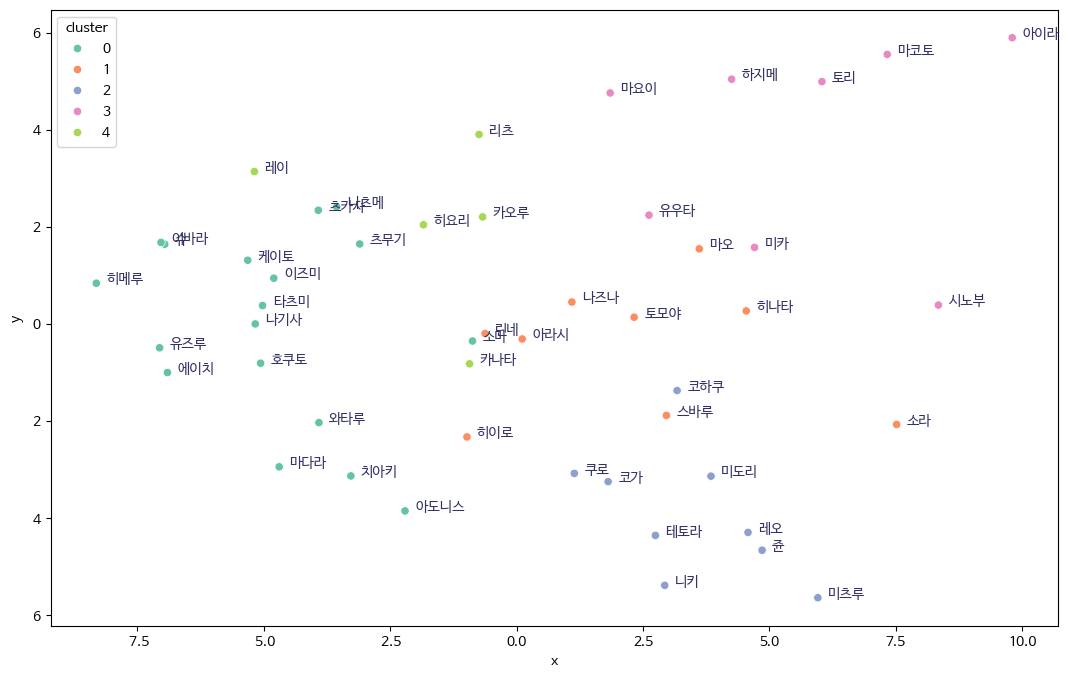

In [87]:
plt.figure(figsize=(13,8))


sns.scatterplot(x='x',y='y',hue='cluster', palette="Set2",data=pca_df)

# label points on the plot
for x, y, name in zip(pca_df['x'], pca_df['y'],pca_df['name']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x+0.2, # x-coordinate position of data label
 y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = name, # data label, formatted to ignore decimals
 color = '#333366') # set colour of line


plt.show()